# Download green spaces

In [1]:
import geopandas as gpd
import osmnx as ox
import matplotlib.pyplot as plt
import os
import folium
import numpy as np

In [2]:
print(os.getcwd(), os.listdir('./'))
os.chdir('./../')
print(os.getcwd(), os.listdir('./'))


/mnt/Datos/proyectospython/EspaciosVerdes/notebooks ['01_dowload_osm.ipynb', '02_scraping.ipynb', 'cache']
/mnt/Datos/proyectospython/EspaciosVerdes ['notebooks', 'criticas_parco_verde.csv', 'data', 'scripts', 'cache', 'venv', 'example.png', 'documents', '.gitignore', 'REAME.md']


In [3]:
def descargar_espacios_verdes(ciudad):
    # 1. Configurar los "tags" (etiquetas) de OpenStreetMap
    # No basta con buscar "park"; para un estudio completo de salud urbana
    # se recomienda incluir bosques, jardines y áreas de recreo.
    tags = {
        'leisure': ['park', 'garden', 'recreation_ground', 'playground'],
        'landuse': ['grass', 'forest', 'meadow', 'village_green', 'recreation_ground'],
        'natural': ['wood', 'scrub', 'heath']
    }

    print(f"Descargando datos para: {ciudad}...")
    
    # 2. Descargar las geometrías usando features_from_place
    # Esto busca dentro de los límites administrativos de la ciudad
    gdf = ox.features_from_place(ciudad, tags=tags)
    
    # 3. Limpieza básica: Filtrar para quedarnos solo con Polígonos (ignorar puntos/nodos simples)
    # A veces los parques pequeños están marcados solo como un punto.
    gdf_poligonos = gdf[gdf.geometry.type.isin(['Polygon', 'MultiPolygon'])]
    
    print(f"Se encontraron {len(gdf_poligonos)} espacios verdes.")
    
    return gdf_poligonos

In [4]:
# --- Dowload ---
nombre_lugar = "Coimbra, Portugal"  # Puedes cambiar esto por cualquier ciudad
# gdf_parques = descargar_espacios_verdes(nombre_lugar)
# Save file
file_name = "data/raw/espacios_verdes_coimbra.geojson"
# gdf_parques.to_file(file_name, driver='GeoJSON')

In [5]:
gdf_parques = gpd.read_file(file_name)

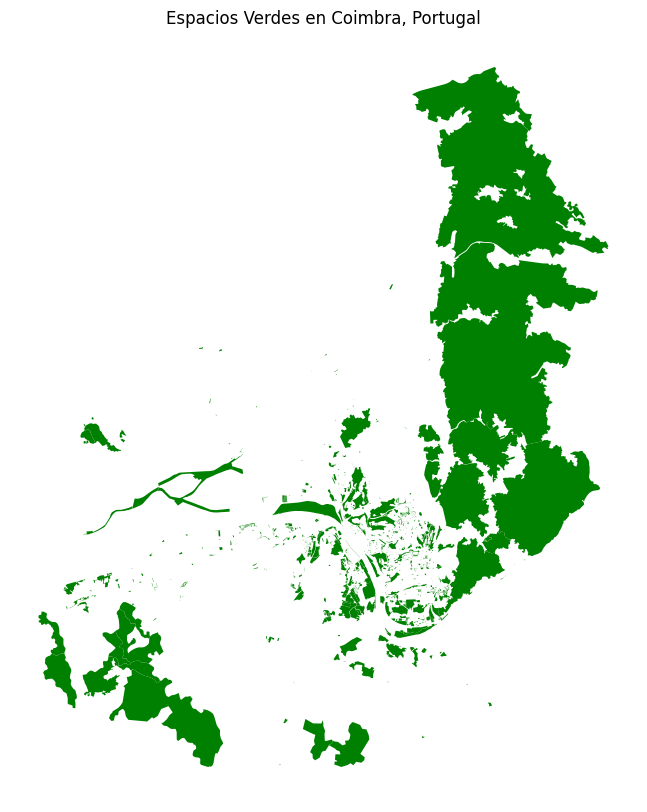

In [6]:
# Proyectamos a Mercator local para evitar distorsión visual al graficar
gdf_parques.to_crs(epsg=3857).plot(color='green', figsize=(10, 10))
plt.title(f"Espacios Verdes en {nombre_lugar}")
plt.axis('off')
plt.show()


# Explore data

In [7]:
# Entities
gdf_parques.shape

(1466, 58)

In [8]:
# Sample
gdf_parques.head()
# gdf_parques.sample(3)

,element,id,leisure,name,access,operator,surface,alt_name,source,wikidata,...,check_date,description,dog,short_name,garden:style,type,heritage:operator,heritage:website:sipa,ref:ipa,geometry
0,relation,3862717,None,None,None,None,None,None,None,None,...,NaT,None,None,None,None,multipolygon,None,None,None,"MULTIPOLYGON (((-8.53 40.22137, -8.5314 40.221..."
1,relation,5659538,None,None,None,None,None,None,None,None,...,NaT,None,None,None,None,multipolygon,None,None,None,"POLYGON ((-8.55799 40.19654, -8.55365 40.19745..."
2,relation,5659539,None,None,None,None,None,None,None,None,...,NaT,None,None,None,None,multipolygon,None,None,None,"POLYGON ((-8.54154 40.19551, -8.54142 40.19683..."
3,relation,5659540,None,None,None,None,None,None,None,None,...,NaT,None,None,None,None,multipolygon,None,None,None,"MULTIPOLYGON (((-8.55491 40.18941, -8.55556 40..."
4,relation,6841081,None,None,None,None,None,None,bing 2016,None,...,NaT,None,None,None,None,multipolygon,None,None,None,"POLYGON ((-8.55353 40.1974, -8.55355 40.19747,..."


In [9]:
# Unique names
gdf_parques["name"].value_counts()

name
Parque Infantil                                         2
Parque do Escravote                                     1
Mata Nacional de Vale de Canas                          1
Parque de Santa Cruz                                    1
Jardim Botânico da Universidade de Coimbra              1
Parque de Campismo de Coimbra                           1
Parque Linear do Vale das Flores                        1
Jardim da Casa do Sal                                   1
Mata Nacional do Choupal                                1
Pinhal de Marrocos                                      1
Praça da Canção                                         1
Parque Verde do Mondego                                 1
Escolinha Canicultura Agrária                           1
Jardim da Sá da Bandeira                                1
Praceta Bartolomeu de Gusmão                            1
Jardim de Montes Claros                                 1
Jardim da Quinta de São Jerónimo                        1
Penedo da

In [10]:
# Select entities with not nan values
gdf = gdf_parques.loc[gdf_parques['name'].notna(), :].copy()
gdf.shape

(59, 58)

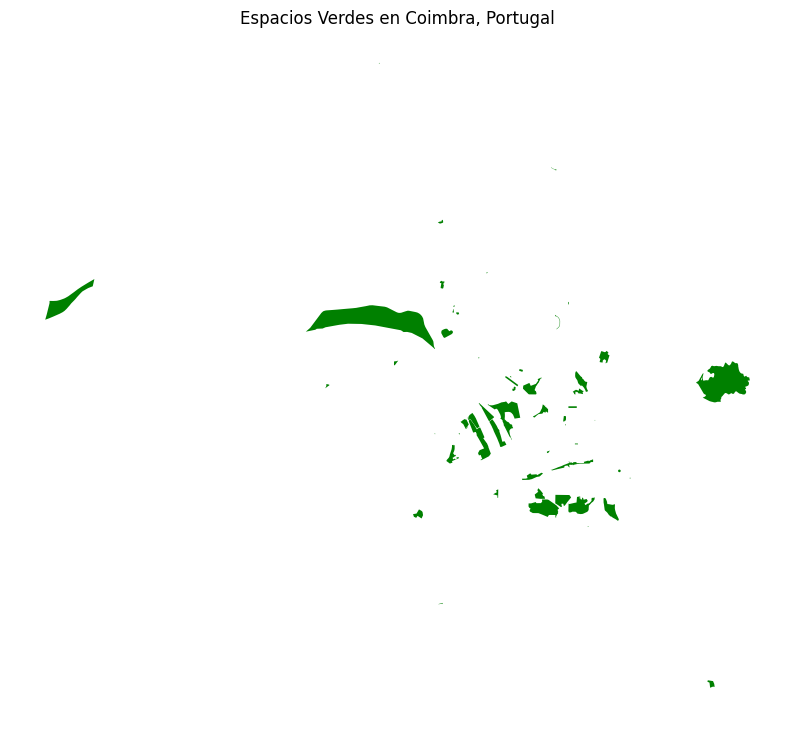

In [11]:
gdf.to_crs(epsg=3857).plot(color='green', figsize=(10, 10))
plt.title(f"Espacios Verdes en {nombre_lugar}")
plt.axis('off')
plt.show()

In [12]:
# Selected only green park
gdf['name'].str.lower()

5                                     parque do escravote
6                                      pinhal de marrocos
9                          mata nacional de vale de canas
11                                   parque de santa cruz
13             jardim botânico da universidade de coimbra
17                          parque de campismo de coimbra
23                       parque linear do vale das flores
29                                  jardim da casa do sal
30                               mata nacional do choupal
31                             parque doutor manuel braga
32                                        praça da canção
35                                parque verde do mondego
37                          escolinha canicultura agrária
42                               jardim da sá da bandeira
52                           praceta bartolomeu de gusmão
66                                jardim de montes claros
67                       jardim da quinta de são jerónimo
68            

In [13]:
# Coordinate Reference System
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
# Reproyect data
gdf.to_crs(4326, inplace=True)

In [15]:
lon, lat = np.mean(gdf["geometry"].centroid.x), np.mean(gdf["geometry"].centroid.y)

/tmp/ipykernel_58470/1642091684.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  lon, lat = np.mean(gdf["geometry"].centroid.x), np.mean(gdf["geometry"].centroid.y)


In [16]:
# @tag:workspaceTrust
m = folium.Map(location=[lat, lon], zoom_start=10, tiles="CartoDB positron")

for _, r in gdf.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = gpd.GeoSeries(r["geometry"]).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"fillColor": "orange"})
    folium.Popup(r["name"]).add_to(geo_j)
    geo_j.add_to(m)

m

In [17]:
gdf["lon"] = gdf["geometry"].centroid.x
gdf["lat"] = gdf["geometry"].centroid.y

/tmp/ipykernel_58470/2958592751.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["lon"] = gdf["geometry"].centroid.x
/tmp/ipykernel_58470/2958592751.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["lat"] = gdf["geometry"].centroid.y


In [18]:
gdf.loc[:, ['name', 'lon', 'lat']]

,name,lon,lat
5,Parque do Escravote,-8.411858,40.248048
6,Pinhal de Marrocos,-8.410927,40.188592
9,Mata Nacional de Vale de Canas,-8.372598,40.210326
11,Parque de Santa Cruz,-8.417257,40.209289
13,Jardim Botânico da Universidade de Coimbra,-8.422735,40.204930
17,Parque de Campismo de Coimbra,-8.398825,40.187762
23,Parque Linear do Vale das Flores,-8.407484,40.195787
29,Jardim da Casa do Sal,-8.436845,40.219067
30,Mata Nacional do Choupal,-8.453297,40.221350
31,Parque Doutor Manuel Braga,-8.427362,40.204783


# Conclusions

In [20]:
file_name = "data/raw/espacios_verdes_coimbra.geojson"
gdf_parques = gpd.read_file(file_name)
gdf = gdf_parques.loc[gdf_parques['name'].notna(), :].copy()
gdf['name'].str.lower().to_list()

['parque do escravote',
 'pinhal de marrocos',
 'mata nacional de vale de canas',
 'parque de santa cruz',
 'jardim botânico da universidade de coimbra',
 'parque de campismo de coimbra',
 'parque linear do vale das flores',
 'jardim da casa do sal',
 'mata nacional do choupal',
 'parque doutor manuel braga',
 'praça da canção',
 'parque verde do mondego',
 'escolinha canicultura agrária',
 'jardim da sá da bandeira',
 'praceta bartolomeu de gusmão',
 'jardim de montes claros',
 'jardim da quinta de são jerónimo',
 'penedo da meditação',
 'jardins da aac',
 'mata do camalhão',
 'lapa dos esteios',
 'parque infantil rua de aveiro',
 'jardim de eiras',
 'jardim de santo antónio dos olivais',
 'parque do choupalinho',
 'parque infantil da casa do sal',
 'parque infantil dos carvalhais de baixo',
 'praça heróis do ultramar',
 'parque verde do mondego - entrada poente',
 'jardim das piscinas',
 'largo 10 de outubro',
 'aeroporto dos pequenitos',
 'parque infantil de são josé',
 'penedo da s

# FIN